## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import requests
import json
import os
import tweepy
%matplotlib inline
import matplotlib.pyplot as plt

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

if consumer_key and consumer_secret and access_token and access_secret:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# Data Wrangling

## Gathering Data

In [2]:
# Gather downloaded csv
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Import tsv file on udacity servers

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
filename = url.split('/')[-1]
if not os.path.exists(filename):
    response = requests.get(url)
    with open(filename, mode='wb') as file:
        file.write(response.content)
df_image = pd.read_csv(filename, sep='\t')


In [4]:
# Add retweets
if not os.path.exists('tweet_json.txt'):
    i = 0
    with open('tweet_json.txt', mode='a') as file:
        n = len(df_twitter.tweet_id.keys())
        for key, status_id in df_twitter.tweet_id.iteritems():
            i += 1
            print("%s/%s" % (i, n))
            try:
                tweet_status = api.get_status(status_id, tweet_mode='extended')
            except:
                continue
            file.write(json.dumps(tweet_status._json))
            file.write("\n")


In [5]:
df_api = pd.DataFrame(columns=['id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt', encoding='utf-8', mode='r') as file:
    i = 0
    while True:
        i += 1
        line = file.readline()
        if not line:
            break
        status_json = json.loads(line)
            
        df_api.loc[i] = [status_json['id'], status_json['retweet_count'], status_json['favorite_count']]
    

## Assesing Data

In [6]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
sum(df_twitter.name.duplicated())

1399

In [8]:
df_twitter[df_twitter.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [9]:
df_twitter.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Toby          7
an            7
Daisy         7
Bailey        7
Bella         6
Stanley       6
Jack          6
Dave          6
Scout         6
Rusty         6
Jax           6
Koda          6
Leo           6
Oscar         6
Milo          6
Larry         5
           ... 
Zuzu          1
Rascal        1
Marty         1
Noah          1
Walker        1
Todo          1
Georgie       1
Tripp         1
by            1
Gòrdón        1
Joshwa        1
Dot           1
Billl         1
Furzey        1
Hermione      1
Clifford      1
Tino          1
Al            1
Steve         1
Snoopy        1
Rorie         1
Boots         1
Remus         1
Zoe           1
Adele         1
Mason         1
Mabel         1
Erik          1
Ralph         1
Dutch         1
Name: name, Length: 957,

It seems there are some lowercase words that are not names

In [10]:
df_twitter.name[df_twitter.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
actually         2
not              2
mad              2
his              1
infuriating      1
space            1
light            1
all              1
by               1
incredibly       1
my               1
such             1
officially       1
old              1
unacceptable     1
life             1
this             1
Name: name, dtype: int64

In [11]:
df_twitter.iloc[2336].text

'Can take selfies 11/10 https://t.co/ws2AMaNwPW'

In [12]:
sum(df_twitter.expanded_urls.duplicated())

137

In [13]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
sum(df_image[df_image['tweet_id'].duplicated()].count())

0

We only have one image for each `tweet_id`.

In [15]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Probabilities of Predictions 2 and 3 are lower than 0.5 so are not very good predicitions.

In [16]:
df_image.query('p1_dog == True')['tweet_id'].count()

1532

We only have 1532 tweets with p1 dog predictions.

In [17]:
df_image.query('p1_dog == True').describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,7.429474e+17,1.212794,0.613823,0.141327,6.180374e-02
std,6.863141e+16,0.574115,0.259735,0.102482,5.255780e-02
min,6.660209e+17,1.000000,0.044333,0.000023,2.160900e-07
25%,6.787998e+17,1.000000,0.390981,0.057067,1.540992e-02
50%,7.200513e+17,1.000000,0.614025,0.127964,4.995100e-02
75%,7.987548e+17,1.000000,0.850559,0.203748,9.527215e-02
max,8.921774e+17,4.000000,0.999956,0.467678,2.734190e-01


In [18]:
df_image.query('p1_dog == True and p1_conf > 0.5').describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,9.730000e+02,973.000000,973.000000,973.000000,9.730000e+02
mean,7.474053e+17,1.281603,0.779460,0.110890,3.536894e-02
std,6.945778e+16,0.654865,0.156797,0.100588,3.645184e-02
min,6.660293e+17,1.000000,0.500373,0.000023,2.160900e-07
25%,6.809134e+17,1.000000,0.636169,0.028290,6.757230e-03
50%,7.325859e+17,1.000000,0.793469,0.082953,2.394360e-02
75%,8.059589e+17,1.000000,0.929266,0.166151,5.004130e-02
max,8.918152e+17,4.000000,0.999956,0.467678,2.168390e-01


In [19]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assesment
### Quality Issues
#### Completeness
- Twitter table has 2356 rows and only 2297 expanded url values
- Twitter table has 2356 rows and image predictions table has 2075 rows.

#### Validity
- There are some tweets that are replies.
- There are some tweets that are retwetts.
- Image predictions table has only 1532 p1 dog predictions.
- `retweeted_status_id` has wrong data type. It is float data type and should be integer.
- `retweeted_status_user_id` has wrong data type. It is float data type and should be integer.
- `timestamp`has wrong datatype. It is a string and should be datetime


#### Acuracy
- There are duplicated Names as 'None', 'a', 'the' and other lowercase words which not seem valid names for a Dog
- Image predictions table p2 and p3 predictions have a probability lower of 0.5.
- Image predictions table has only 973 p1 predictions with a probability greater than 0.5.


#### Consistency
- Dog stage columns `doggo`,`floofer`, `pupper`, `puppo` contain 'None' values instead of Nan
- There are values of `rating_numerator` below 10 and therefore there are not consistent with We rate dogs rating system.
- There are values of `rating_denominator` different from 10 and therefore there are not consistent with We rate dogs rating system.

### Tidiness Isssues
- There are three different tables and we only have two types of observational units.
- Dog stage as is one variable should be only one column. Now is distributed is in several columns `doggo`, `floofer`, `pupper` and `puppo`. This column should be an enumerate.

#### 1. Clean names
###### Action
- Replace all invalid names (None, a, an, the) with NaN

In [20]:
# Make a copy to keep original data dataframe
df_clean = df_twitter.copy()

df_clean.loc[df_clean.name.str.islower(), 'name'] = np.nan
df_clean.loc[df_clean.name=='None', 'name'] = np.nan


##### Test


In [21]:
assert(sum(df_clean.name == 'None') == 0)
assert(sum(df_clean.query('name == name').name.str.islower()) == 0)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Fix dog stage
###### Action
- Replace all None values with NaN
- Join four coloumns in one column
- Change column type as enumerate

###### Code

In [23]:

df_clean.replace(to_replace='None', value='', inplace=True)
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.stage.value_counts()




                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [24]:
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'multiple'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'multiple'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'multiple'

df_clean.replace(to_replace='', value=np.nan, inplace=True)
df_clean.stage = df_clean.stage.astype('category')
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
df_clean.stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: stage, dtype: int64

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 241.9+ KB


##### Test


In [26]:
assert('stage' in df_clean.columns.array)
assert(sum(df_clean.stage.isna())>0)
assert(df_clean.stage.dtype == 'category')
assert('doggo' not in df_clean.columns.array)
assert('floofer' not in df_clean.columns.array)
assert('pupper' not in df_clean.columns.array)
assert('puppo' not in df_clean.columns.array)



#### 3. Clean Retweets and Replys
###### Action
- Merge csv dataset with the one obtained from the API
- Exclude retweets
- Exclude replies
- Remove unneded columns
- We check if there are still duplicates

In [27]:
df_clean = df_clean.merge(df_api, how='inner', left_on='tweet_id', right_on='id')

In [28]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,892420643555336193,7898,37020
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,892177421306343426,5870,31857
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,891815181378084864,3874,23992
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,891689557279858688,8065,40349
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,891327558926688256,8735,38563


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 17 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          1487 non-null object
stage                         376 non-null category
id                            2333 non-null object
retweet_count                 2333 non-null object
favorite_count                2333 non-null object
dtypes: category(1), float64(4

`retweet_count`and `favorite_count`are astrings and sohould be integers. 

In [30]:
df_clean.retweet_count = df_clean.retweet_count.astype(int)
df_clean.favorite_count = df_clean.favorite_count.astype(int)

In [31]:
df_clean = df_clean.query('retweeted_status_id != retweeted_status_id')
df_clean = df_clean.query('in_reply_to_status_id != in_reply_to_status_id')

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2332
Data columns (total 17 columns):
tweet_id                      2090 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2090 non-null object
source                        2090 non-null object
text                          2090 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2087 non-null object
rating_numerator              2090 non-null int64
rating_denominator            2090 non-null int64
name                          1383 non-null object
stage                         335 non-null category
id                            2090 non-null object
retweet_count                 2090 non-null int64
favorite_count                2090 non-null int64
dtypes: category(1), float64(4), int64(4

##### Test

In [33]:
assert(sum(df_clean.retweeted_status_id.notnull()) == 0)
assert(sum(df_clean.in_reply_to_status_id.notnull()) == 0)
assert(df_clean.retweet_count.dtypes == 'int')
assert(df_clean.favorite_count.dtypes == 'int')

In [34]:
columns_to_delete = ['in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']
df_clean.drop(columns=columns_to_delete, inplace=True)


In [35]:
assert(columns_to_delete not in df_clean.columns.array)


##### 4. Cleaning rating system

###### Action
- Obtain correct rating values from the tweet text.
- Drop not valid denominator values.


In [36]:
df_clean.query('rating_denominator != 10 or rating_numerator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
44,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,883482846933004288,9256,43965
220,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN,848212111729840128,3074,16476
301,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,835152434251116546,3108,22970
417,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,820690176645140481,3370,12630
499,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,810984652412424192,1513,5564
712,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,NaN,NaN,781661882474196992,2835,10869
746,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,NaN,777885040357281792,1698,6607
794,771014301343748096,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7,10,NaN,NaN,771014301343748096,1712,7121
814,768193404517830656,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,768193404517830656,3687,11263
824,766423258543644672,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,NaN,766423258543644672,1652,6209


Let's find what kind of problems are we having.

In [37]:
df_clean.loc[44, 'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In this case the problem was obtaining 5 instead of 13.5. This could be solved by extracting again from the text.
Let's check if there are more in the same situation.

In [38]:
df_clean[df_clean.text.str.contains('\d+\.\d+\/10', regex=True)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
44,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,883482846933004288,9256,43965
677,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,786709082849828864,6406,18993
744,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,778027034220126208,1686,6795
1690,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN,680494726643068929,493,1754


In [39]:
df_clean[['rating_numerator', 'rating_denominator']] = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean.rating_numerator = pd.to_numeric(df_clean.rating_numerator, errors='coerce')
df_clean.rating_denominator = pd.to_numeric(df_clean.rating_denominator, errors='coerce').astype(int)

In [40]:
df_clean.loc[417, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In this case there are more than one dog in the tweet (there are seven). We should divide the rating. I am going to look for more cases like this to fix them.

In [41]:
df_clean.query('rating_denominator > 10 and rating_denominator%10 == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
417,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,NaN,NaN,820690176645140481,3370,12630
881,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,NaN,NaN,758467244762497024,2294,4949
1098,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,NaN,NaN,731156023742988288,1295,3905
1143,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20,NaN,NaN,722974582966214656,1583,4165
1180,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,NaN,716439118184652801,214,2413
1206,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90,NaN,NaN,713900603437621249,752,2884
1232,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,NaN,NaN,710658690886586372,571,2359
1252,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,NaN,NaN,709198395643068416,655,2470
1329,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,NaN,NaN,704054845121142784,930,2984
1411,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40,NaN,NaN,697463031882764288,1418,3483


In [42]:
mask = (df_clean['rating_denominator'] > 10) & (df_clean['rating_denominator'] % 10 == 0)
df_clean.loc[mask, 'rating_numerator'] = df_clean[mask]['rating_numerator'] / (df_clean[mask]['rating_denominator']/10)
df_clean.loc[mask, 'rating_denominator'] = 10


In [43]:
df_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
499,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,NaN,810984652412424192,1513,5564
1046,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11,NaN,NaN,740373189193256964,13588,35674
1640,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,NaN,682962037429899265,16992,37647
2312,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,NaN,NaN,666287406224695296,63,140


In [44]:
df_clean.loc[2312, 'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

We can fix this case

In [45]:
df_clean.loc[1640, 'text']

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [46]:
df_clean.loc[1046, 'text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [47]:
df_clean.loc[499, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In this last case there is no rating at all

I fix the fixable cases and drop the last one.

In [48]:
mask = (df_clean['rating_denominator'] != 10)
second_values = df_clean[mask].text.str.extract('((?:\d+\.)?\d+)\/(10)')
second_values
second_values[0]

499     NaN
1046     14
1640     10
2312      9
Name: 0, dtype: object

In [49]:
df_clean.loc[mask, 'rating_numerator'] = second_values[0]
df_clean.loc[mask, 'rating_denominator'] = second_values[1]

In [50]:
# Look for NaN denominator

df_clean.query('rating_denominator != rating_denominator')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count
499,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,NaN,810984652412424192,1513,5564


In [51]:
df_clean = df_clean.query('rating_denominator == rating_denominator')

In [52]:
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(int)
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [53]:
df_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,id,retweet_count,favorite_count


#### Test

In [54]:
assert(sum(df_clean.query('rating_denominator < 10').count()) == 0)

##### 5. Fix Timestamp Datatype
###### Actions
- Convert datatype to datetime

In [55]:
df_clean.timestamp = df_clean.timestamp.astype('datetime64[ns]')

#### Test

In [56]:
assert(df_clean.timestamp.dtype == 'datetime64[ns]')

## Storing cleaned data in master csv

In [57]:
with open('twitter_archive_master.csv', mode='w+') as file:
    file.write(df_clean.to_csv(index=False))

# Analysis

I am going look for insights for the following questions:

1. What are the most popular dog breeds?
2. What popular dog breeds have better ratings, retweets and favorites?
3. What factors are related with having more reweets and favorites?


In [58]:
df = df_clean.copy()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2332
Data columns (total 12 columns):
tweet_id              2089 non-null object
timestamp             2089 non-null datetime64[ns]
source                2089 non-null object
text                  2089 non-null object
expanded_urls         2086 non-null object
rating_numerator      2089 non-null float64
rating_denominator    2089 non-null int64
name                  1382 non-null object
stage                 335 non-null category
id                    2089 non-null object
retweet_count         2089 non-null int64
favorite_count        2089 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 198.1+ KB


### 1. What dog stage has better ratings, retweets and favorites?

In [60]:
stages=['doggo', 'floofer', 'multiple', 'pupper', 'puppo']
ratings = pd.DataFrame(columns=['stage', 'rating_numerator', 'retweet_count', 'favorite_count'])
for stage in stages:
    m = df.stage==stage
    ratings.loc[stage] = stage, df[m]['rating_numerator'].mean(), df[m]['retweet_count'].mean(), df[m]['favorite_count'].mean()
ratings

,stage,rating_numerator,retweet_count,favorite_count
doggo,doggo,11.830986,6198.957746,17922.521127
floofer,floofer,11.888889,3741.000000,10333.666667
multiple,multiple,11.272727,5146.454545,16092.090909
pupper,pupper,10.734253,2255.556561,6855.923077
puppo,puppo,12.000000,6083.086957,21202.304348


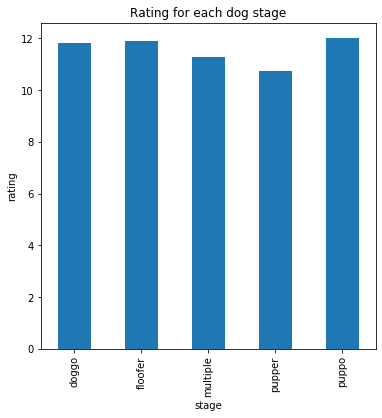

In [61]:
ratings['rating_numerator'].plot(kind='bar', figsize=(6, 6));
plt.title('Rating for each dog stage');
plt.xlabel('stage');
plt.ylabel('rating');

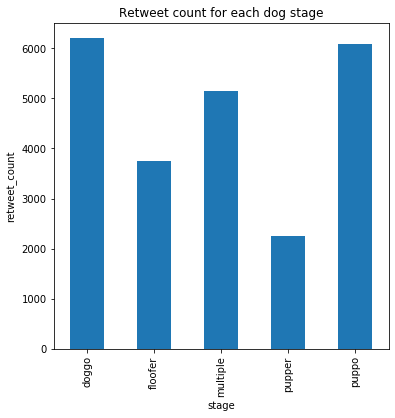

In [62]:
ratings['retweet_count'].plot(kind='bar', figsize=(6, 6));
plt.title('Retweet count for each dog stage');
plt.xlabel('stage');
plt.ylabel('retweet_count');

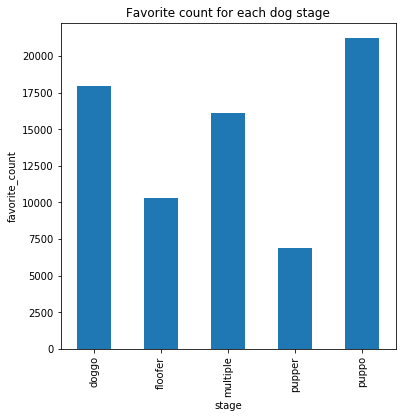

In [63]:
ratings['favorite_count'].plot(kind='bar', figsize=(6, 6));
plt.title('Favorite count for each dog stage');
plt.xlabel('stage');
plt.ylabel('favorite_count');

### 2. What breeds are most popular? What ratings have the most popular breeds?

In order to analyse what dog breed has better ratings, first we should asign each dog a breed.
As we don't want to minimize failing in the assignment of dog breed to each dog we are going to consider only dogs with a probability of detecting breeds greater than 0.5.

In [64]:
sum(df_image[df_image['tweet_id'].duplicated()].count())

0

We only have one image for each tweet

In [65]:
df_breed = df.copy()
df_image_valid = df_image.query('p1_dog == True and p1_conf > 0.5')


In [66]:
df_image_valid = df_image.query('p1_dog == True and p1_conf > 0.5')
df_breed = df.merge(df_image_valid, how='inner', on='tweet_id')
df_breed.p1.value_counts()

golden_retriever                  115
Pembroke                           70
Labrador_retriever                 62
Chihuahua                          46
pug                                43
Samoyed                            29
Pomeranian                         29
chow                               26
toy_poodle                         23
French_bulldog                     21
German_shepherd                    19
malamute                           18
Maltese_dog                        15
cocker_spaniel                     14
Shetland_sheepdog                  12
Cardigan                           12
Shih-Tzu                           11
West_Highland_white_terrier        11
miniature_pinscher                 11
Chesapeake_Bay_retriever           11
Bernese_mountain_dog               10
vizsla                             10
Eskimo_dog                          9
basset                              9
Rottweiler                          9
Pekinese                            9
dalmatian   

We are going to considere top 10 dog breeds and we will keep under the category other.

In [67]:
top_10_breeds = df_breed.p1.value_counts().keys()[:10]
df_breed.p1 = df_breed.p1.where(df_breed.p1.isin(top_10_breeds), other='other')
df_breed.p1.value_counts()

other                 458
golden_retriever      115
Pembroke               70
Labrador_retriever     62
Chihuahua              46
pug                    43
Pomeranian             29
Samoyed                29
chow                   26
toy_poodle             23
French_bulldog         21
Name: p1, dtype: int64

In [68]:
breed_ratings = pd.DataFrame(columns=['breed', 'rating_numerator', 'retweet_count', 'favorite_count'])
for breed in df_breed.p1.value_counts().keys():
    m = df_breed.p1==breed
    breed_ratings.loc[breed] = breed, df_breed[m]['rating_numerator'].mean(), df_breed[m]['retweet_count'].mean(), df_breed[m]['favorite_count'].mean()
breed_ratings

,breed,rating_numerator,retweet_count,favorite_count
other,other,10.780066,2242.144105,8195.534934
golden_retriever,golden_retriever,11.682609,3352.782609,11972.991304
Pembroke,Pembroke,11.657143,3341.300000,12366.885714
Labrador_retriever,Labrador_retriever,11.129032,4231.129032,12987.241935
Chihuahua,Chihuahua,10.565217,3113.521739,9128.304348
pug,pug,10.209302,1460.906977,4844.395349
Pomeranian,Pomeranian,11.172414,2527.896552,7381.448276
Samoyed,Samoyed,11.793103,3997.724138,12417.034483
chow,chow,11.730769,2927.653846,11055.730769
toy_poodle,toy_poodle,11.130435,2716.913043,7372.347826


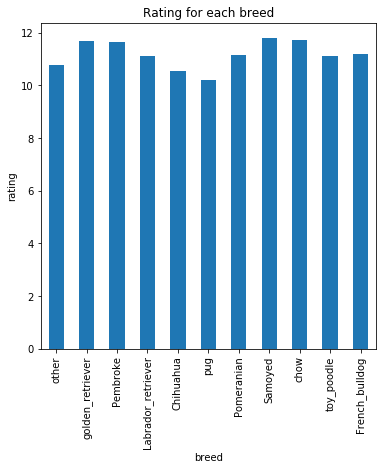

In [69]:
breed_ratings['rating_numerator'].plot(kind='bar', figsize=(6, 6));
plt.title('Rating for each breed');
plt.xlabel('breed');
plt.ylabel('rating');

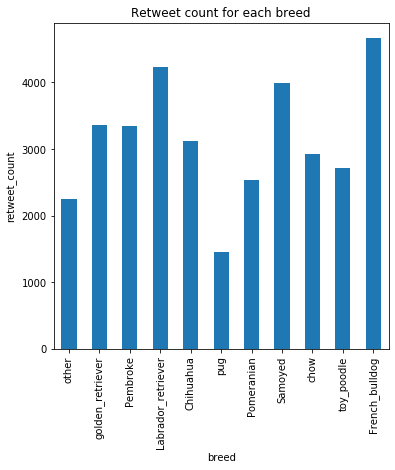

In [70]:
breed_ratings['retweet_count'].plot(kind='bar', figsize=(6, 6));
plt.title('Retweet count for each breed');
plt.xlabel('breed');
plt.ylabel('retweet_count');

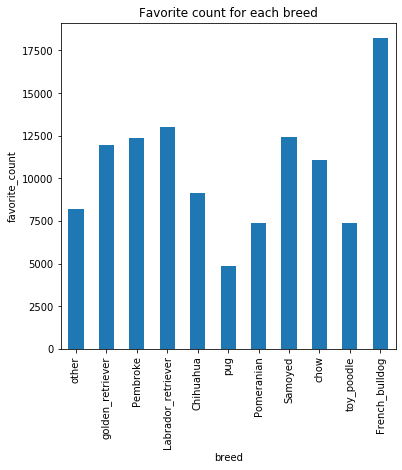

In [71]:
breed_ratings['favorite_count'].plot(kind='bar', figsize=(6, 6));
plt.title('Favorite count for each breed');
plt.xlabel('breed');
plt.ylabel('favorite_count');

### 3. What factors are related with having more reweets and favorites?

In [72]:
df_breed['intercept'] = 1
df_breed[['doggo', 'floofer', 'multiple', 'pupper', 'puppo']] = pd.get_dummies(df_breed['stage'])
df_breed.drop(columns='multiple', inplace=True)

In [73]:
df_breed.p1.unique()


array(['Chihuahua', 'other', 'Pomeranian', 'Pembroke', 'Samoyed',
       'French_bulldog', 'golden_retriever', 'pug', 'chow',
       'Labrador_retriever', 'toy_poodle'], dtype=object)

In [74]:
df_breed[['Chihuahua', 'French_bulldog', 'Labrador_retriever', 'Pembroke', 'Pomeranian', 'Samoyed', 'chow', 'golden_retriever', 'other', 'pug', 'toy_poodle']] = pd.get_dummies(df_breed['p1'])
df_breed.drop(columns='other', inplace=True)

In [75]:
model_retweet = sm.OLS(df_breed['retweet_count'], df_breed[['intercept', 'doggo', 'floofer', 'pupper', 'puppo', 'Chihuahua', 'French_bulldog', 'Labrador_retriever', 'Pembroke', 'Pomeranian', 'Samoyed', 'chow', 'golden_retriever', 'pug', 'toy_poodle', 'rating_numerator']])
result_retweet = model_retweet.fit()
result_retweet.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     9.967
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.09e-22
Time:                        23:29:00   Log-Likelihood:                -9071.3
No. Observations:                 922   AIC:                         1.817e+04
Df Residuals:                     906   BIC:                         1.825e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept          -7451.5247   1070.978     -6.958      0.000   -9553.410   -5349.639
doggo               4473.9587    862.021      5.190      0.000    2782.169    6165.749
floofer             3159.2323   2692.205      1.173      0.241   -2124.451    8442.915
pupper               -97.7477    483.580     -0.202      0.840   -1046.814     851.319
puppo                723.9969   1202.727      0.602      0.547   -1636.458    3084.452
Chihuahua           1127.3925    709.446      1.589      0.112    -264.956    2519.741
French_bulldog      2231.7730   1022.956      2.182      0.029     224.133    4239.413
Labrador_retriever  1605.8008    620.804      2.587      0.010     387.419    2824.183
Pembroke             416.5247    594.408      0.701      0.484    -750.052    1583.101
Pomeranian          -145.2610    883.277     -0.164      0.869   -1878.768    1588.246
Samoyed              916.3757    888.173      1.032      0.302    -826.741    2659.492
chow                -145.7188    935.223     -0.156      0.876   -1981.174    1689.737
golden_retriever     160.2881    485.790      0.330      0.742    -793.117    1113.693
pug                 -101.5027    732.821     -0.139      0.890   -1539.727    1336.721
toy_poodle           340.8742    979.651      0.348      0.728   -1581.774    2263.523
rating_numerator     884.4725     97.716      9.051      0.000     692.697    1076.248
==============================================================================
Omnibus:                     1331.074   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           386341.126
Skew:                           8.063   Prob(JB):                         0.00
Kurtosis:                     101.977   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model_favorite = sm.OLS(df_breed['favorite_count'], df_breed[['intercept', 'doggo', 'floofer', 'pupper', 'puppo', 'Chihuahua', 'French_bulldog', 'Labrador_retriever', 'Pembroke', 'Pomeranian', 'Samoyed', 'chow', 'golden_retriever', 'pug', 'toy_poodle', 'rating_numerator']])
result_favorite = model_favorite.fit()
result_favorite.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     18.42
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.70e-43
Time:                        23:29:00   Log-Likelihood:                -9944.2
No. Observations:                 922   AIC:                         1.992e+04
Df Residuals:                     906   BIC:                         2.000e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept          -2.939e+04   2760.300    -10.647      0.000   -3.48e+04    -2.4e+04
doggo               9973.9308   2221.742      4.489      0.000    5613.571    1.43e+04
floofer             5633.2851   6938.794      0.812      0.417   -7984.694    1.93e+04
pupper              -995.2277   1246.361     -0.799      0.425   -3441.318    1450.862
puppo               4169.5187   3099.867      1.345      0.179   -1914.235    1.03e+04
Chihuahua           1815.0572   1828.501      0.993      0.321   -1773.532    5403.647
French_bulldog      9058.7630   2636.532      3.436      0.001    3884.343    1.42e+04
Labrador_retriever  3345.3159   1600.040      2.091      0.037     205.101    6485.531
Pembroke            1335.2307   1532.006      0.872      0.384   -1671.462    4341.923
Pomeranian         -2189.8336   2276.527     -0.962      0.336   -6657.714    2278.047
Samoyed              906.4392   2289.147      0.396      0.692   -3586.208    5399.087
chow                -490.7666   2410.411     -0.204      0.839   -5221.405    4239.871
golden_retriever     333.4951   1252.058      0.266      0.790   -2123.777    2790.767
pug                 -902.7452   1888.747     -0.478      0.633   -4609.573    2804.083
toy_poodle         -1548.4422   2524.917     -0.613      0.540   -6503.809    3406.925
rating_numerator    3457.3950    251.849     13.728      0.000    2963.119    3951.671
==============================================================================
Omnibus:                      909.905   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50955.966
Skew:                           4.501   Prob(JB):                         0.00
Kurtosis:                      38.290   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R-squared value in retweet model 0.140 and in favorite model is 0.232. This the proportion of the value of retweet count and favorite that we can explain using ratings, dog stages and most popular breed. 
- In both cases there are some factors with low p_values as: rating_numerator, French_bulldog breed, Labrador_retriever breed and doggo stage all with positive coeficients indicating a high influence in retweet count.

## Analysis Conclusions

### 1. What dog stage has better ratings, retweets and favorites?
- All dog stages have similar rating average. The highest rating_average is for `puppo`
- `doggo`is the stage with higher average retweet count. The second one is `puppo`.
- `puppo`is the stage with higher average favorite count. The second one is `doggo`.

### 2. What are the most popular breeds? What breed has better ratings, retweets and favorites?
- The most popular breed is `golden_retriever` followed by: `Pembroke`, `Labrador_retriever`, `Chihuahua`, `pug`, Pomerianian, `Samoyed`, `chow`, `toy_poodle`, `French_bulldog`.
- `Samoyed` is the breed with higher average rating.
- French Bulldog is the breed with higher average retweet count.
- French Bulldog is the breed with higher average favorite count.

### 3. What factors are related with having more reweets and favorites?
- In both `rewteet_count` and `favorite_count` there are some factors with high influence. They are `rating_numerator`, `French_bulldog` breed, `Labrador_retriever` breed and `doggo` stage all with positive coeficients indicating a high positive influence in both `retweet_count` and `favorite_count`.